In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split



## Data preprocessing

In [2]:
data=pd.read_csv('trecking data.csv')
data

,Unnamed: 0,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...,...
403,403,14,Team,NaN,No,No,Homely food,Yes,Rainy,No,two
404,404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [3]:
data=data.drop('Unnamed: 0',axis=1)
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...
403,14,Team,NaN,No,No,Homely food,Yes,Rainy,No,two
404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     408 non-null    int64 
 1   solo/team               405 non-null    object
 2   M/F                     404 non-null    object
 3   Are you smoker          407 non-null    object
 4   jeep_service            407 non-null    object
 5   food_habit              405 non-null    object
 6   exercise                408 non-null    object
 7   climate                 408 non-null    object
 8   status                  408 non-null    object
 9   Nomber of team members  406 non-null    object
dtypes: int64(1), object(9)
memory usage: 32.0+ KB


In [5]:
data.nunique()

age                       55
solo/team                  2
M/F                        2
Are you smoker             2
jeep_service               2
food_habit                 2
exercise                   2
climate                    2
status                     2
Nomber of team members     7
dtype: int64

In [6]:
data.isna().sum()

age                       0
solo/team                 3
M/F                       4
Are you smoker            1
jeep_service              1
food_habit                3
exercise                  0
climate                   0
status                    0
Nomber of team members    2
dtype: int64

In [7]:
data.columns.to_list()

['age',
 'solo/team',
 'M/F',
 'Are you smoker',
 'jeep_service',
 'food_habit',
 'exercise',
 'climate',
 'status',
 'Nomber of team members']

In [8]:
data['solo/team'].unique()

array(['Team', 'Solo', nan], dtype=object)

In [9]:
data['M/F'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data['Are you smoker'].unique()

array(['Yes', 'No', nan], dtype=object)

In [11]:
data['jeep_service'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [12]:
data['climate'].unique()

array(['Rainy', 'Hot'], dtype=object)

In [13]:
data['status'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data['food_habit'].unique()

array(['Fast food', 'Homely food', nan], dtype=object)

In [15]:
data['Nomber of team members'].unique()

array(['four', 'two', 'tree', 'five', nan, 'one', 'unkown', 'eight'],
      dtype=object)

## Data cleaning

In [16]:
data['solo/team']=data['solo/team'].fillna(method='bfill')
data['M/F']=data['M/F'].fillna(method='ffill')
data['food_habit']=data['food_habit'].fillna(method='bfill')
data['Are you smoker']=data['Are you smoker'].fillna(method='bfill')
data['jeep_service']=data['jeep_service'].fillna(method='bfill')

data['Nomber of team members']=data['Nomber of team members'].fillna(method='ffill')

data

C:\Users\mohammed shibil\AppData\Local\Temp\ipykernel_23108\1693055802.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['solo/team']=data['solo/team'].fillna(method='bfill')
C:\Users\mohammed shibil\AppData\Local\Temp\ipykernel_23108\1693055802.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['M/F']=data['M/F'].fillna(method='ffill')
C:\Users\mohammed shibil\AppData\Local\Temp\ipykernel_23108\1693055802.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['food_habit']=data['food_habit'].fillna(method='bfill')
C:\Users\mohammed shibil\AppData\Local\Temp\ipykernel_23108\1693055802.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfil

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...
403,14,Team,Male,No,No,Homely food,Yes,Rainy,No,two
404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [17]:
data.nunique()

age                       55
solo/team                  2
M/F                        2
Are you smoker             2
jeep_service               2
food_habit                 2
exercise                   2
climate                    2
status                     2
Nomber of team members     7
dtype: int64

In [18]:
data['Nomber of team members'].unique()

array(['four', 'two', 'tree', 'five', 'one', 'unkown', 'eight'],
      dtype=object)

In [19]:
data['Nomber of team members']=data['Nomber of team members'].replace('tree','three')
data['Nomber of team members']=data['Nomber of team members'].replace('unkown','six')

In [20]:
data['Nomber of team members'].unique()

array(['four', 'two', 'three', 'five', 'one', 'six', 'eight'],
      dtype=object)

In [21]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...
403,14,Team,Male,No,No,Homely food,Yes,Rainy,No,two
404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [22]:
data.isna().sum()

age                       0
solo/team                 0
M/F                       0
Are you smoker            0
jeep_service              0
food_habit                0
exercise                  0
climate                   0
status                    0
Nomber of team members    0
dtype: int64

## EDA

### pie chart

#### M/F

<Axes: ylabel='count'>

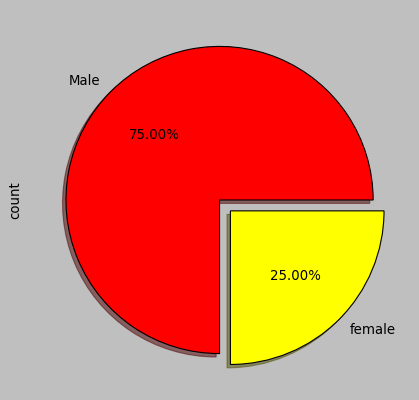

In [23]:
x=['Male','female']
plt.style.use('classic')
data['M/F'].value_counts().plot.pie(autopct='%.2f%%',labels=x,explode=[0,0.1],shadow=True,colors=['red','yellow'])


In [24]:
data['M/F'].value_counts()

M/F
Male      306
Female    102
Name: count, dtype: int64

#### Are you smoker

<Axes: ylabel='count'>

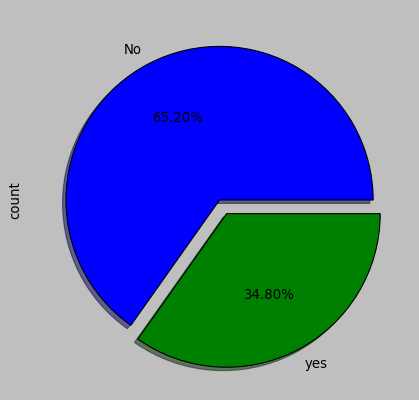

In [25]:
label=['No','yes']
plt.style.use('classic')
data['Are you smoker'].value_counts().plot.pie(labels=label,autopct='%.2f%%',explode=[0,0.1],shadow=True)

In [26]:
data['Are you smoker'].value_counts()

Are you smoker
No     266
Yes    142
Name: count, dtype: int64

#### jeep_service

<Axes: ylabel='count'>

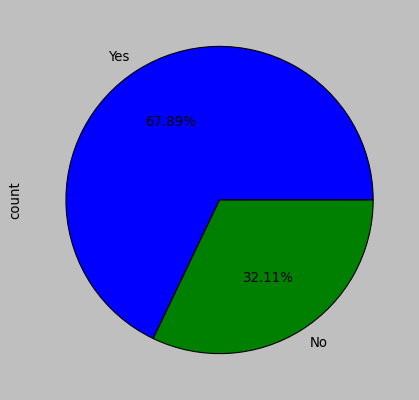

In [27]:
label=['Yes','No']
plt.style.use('classic')
data['jeep_service'].value_counts().plot.pie(autopct='%.2f%%',labels=label)

In [28]:
data['jeep_service'].value_counts()

jeep_service
No     277
Yes    131
Name: count, dtype: int64

#### food_habit

<Axes: ylabel='count'>

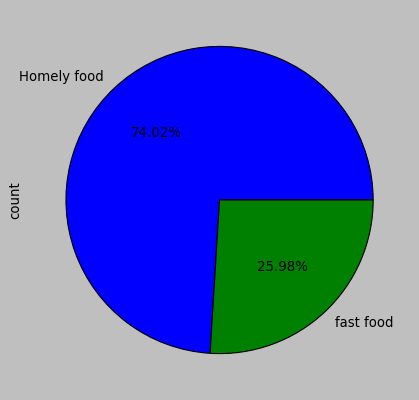

In [29]:
label=['Homely food','fast food']
plt.style.use('classic')
data['food_habit'].value_counts().plot.pie(autopct='%.2f%%',labels=label)

In [30]:
data['food_habit'].value_counts()

food_habit
Homely food    302
Fast food      106
Name: count, dtype: int64

#### exercise

<Axes: ylabel='count'>

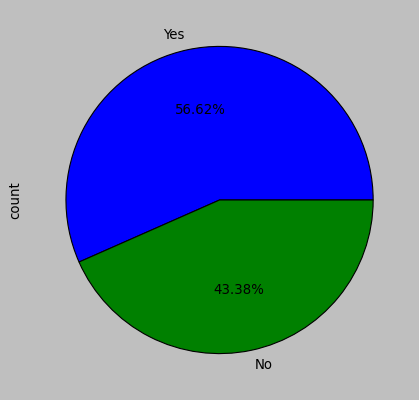

In [31]:
label=['Yes','No']
plt.style.use('classic')
data['exercise'].value_counts().plot.pie(labels=label,autopct='%.2f%%')

In [32]:
data['exercise'].value_counts()

exercise
Yes    231
No     177
Name: count, dtype: int64

#### status

<Axes: ylabel='count'>

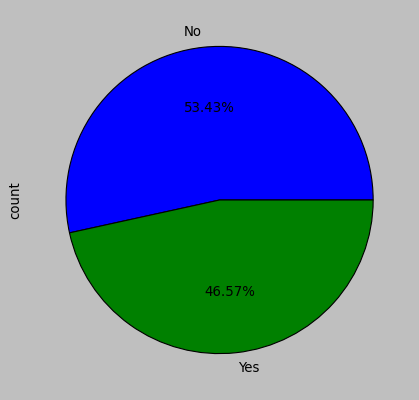

In [33]:
label=['No','Yes']
plt.style.use('classic')
data['status'].value_counts().plot.pie(labels=label,autopct='%.2f%%')

In [34]:
data['status'].value_counts()

status
No     218
Yes    190
Name: count, dtype: int64

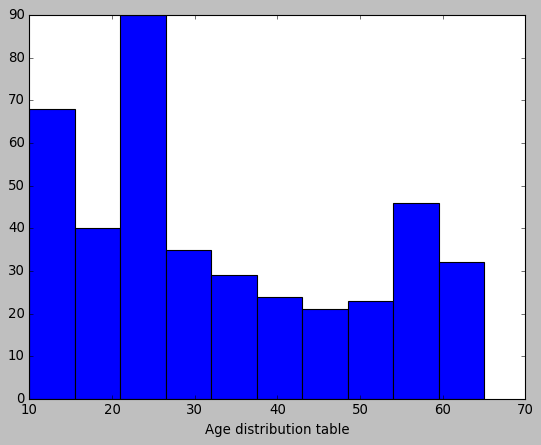

In [35]:

plt.hist(data['age'])
plt.xlabel('Age distribution table')
plt.show()

### Barplot

C:\Users\mohammed shibil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


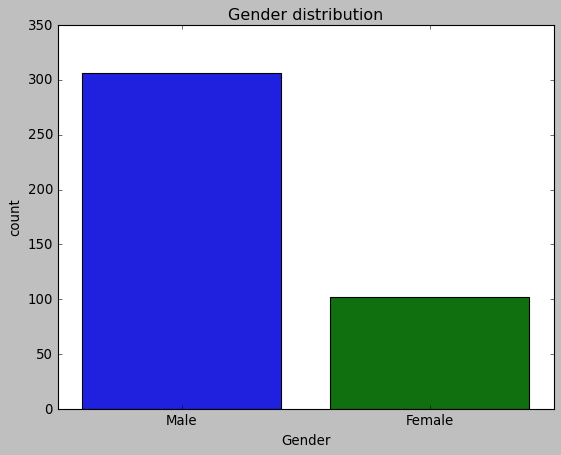

In [36]:
sns.barplot(x=['Male','Female'],y=data['M/F'].value_counts())
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.show()

### scatterplot

### Machine learning

In [37]:
from sklearn.preprocessing import LabelEncoder



In [38]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...
403,14,Team,Male,No,No,Homely food,Yes,Rainy,No,two
404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [39]:
le=LabelEncoder()
data['solo/team']=le.fit_transform(data['solo/team'])
data['M/F']=le.fit_transform(data['M/F'])
data['Are you smoker']=le.fit_transform(data['Are you smoker'])
data['jeep_service']=le.fit_transform(data['jeep_service'])

data['food_habit']=le.fit_transform(data['food_habit'])
data['exercise']=le.fit_transform(data['exercise'])
data['climate']=le.fit_transform(data['climate'])
data['Nomber of team members']=le.fit_transform(data['Nomber of team members'])
data['status']=le.fit_transform(data['status'])
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,2
1,24,1,1,1,0,1,0,1,1,2
2,23,1,1,0,0,0,1,1,1,2
3,25,1,1,0,0,0,0,1,1,2
4,22,1,0,0,0,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,6
404,15,0,1,1,0,1,0,1,0,3
405,16,0,1,1,1,0,1,1,1,3
406,17,0,1,1,0,0,0,1,0,3


#### model1 Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
x=data.drop('status',axis=1)
y=data['status']

In [42]:
x

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,Nomber of team members
0,23,1,1,1,0,0,1,1,2
1,24,1,1,1,0,1,0,1,2
2,23,1,1,0,0,0,1,1,2
3,25,1,1,0,0,0,0,1,2
4,22,1,0,0,0,1,0,1,6
...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,6
404,15,0,1,1,0,1,0,1,3
405,16,0,1,1,1,0,1,1,3
406,17,0,1,1,0,0,0,1,3


In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    1
406    0
407    1
Name: status, Length: 408, dtype: int32

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=33)

In [45]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
model.coef_

array([[-0.04311095,  1.40659539,  0.39353868, -0.20799862,  0.41764276,
         0.22821263,  0.75342332, -0.49437148, -0.0304008 ]])

In [47]:
model.intercept_

array([-0.71179145])

In [48]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [49]:
pd.DataFrame({'True y value':y_test,'predicted y value':y_pred})

,True y value,predicted y value
96,1,0
38,1,1
0,1,1
34,1,1
249,0,0
404,0,0
134,1,0
122,1,1
376,0,0
346,0,0


In [50]:
model.score(x_test,y_test)

0.8536585365853658

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [53]:
scaled_model=LogisticRegression()
scaled_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [54]:
scaled_model.score(x_test_scaled,y_test)

0.8292682926829268

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  2],
       [ 4, 18]], dtype=int64)

Text(56.0, 0.5, 'predicted value')

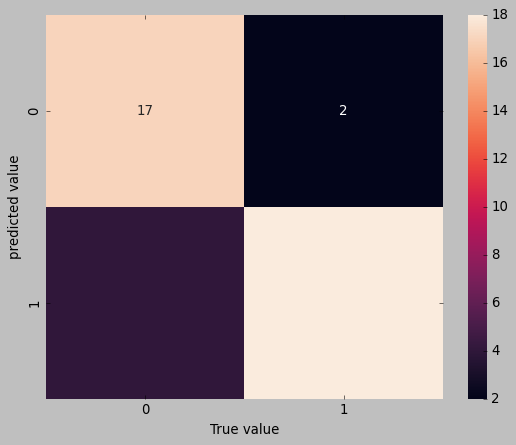

In [57]:
sns.heatmap(cm,annot=True)
plt.xlabel('True value')
plt.ylabel('predicted value')

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.90      0.82      0.86        22

    accuracy                           0.85        41
   macro avg       0.85      0.86      0.85        41
weighted avg       0.86      0.85      0.85        41



#### model 2 Decision tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [60]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,2
1,24,1,1,1,0,1,0,1,1,2
2,23,1,1,0,0,0,1,1,1,2
3,25,1,1,0,0,0,0,1,1,2
4,22,1,0,0,0,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,6
404,15,0,1,1,0,1,0,1,0,3
405,16,0,1,1,1,0,1,1,1,3
406,17,0,1,1,0,0,0,1,0,3


In [61]:
x=data.drop('status',axis=1)
y=data['status']

In [62]:
x

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,Nomber of team members
0,23,1,1,1,0,0,1,1,2
1,24,1,1,1,0,1,0,1,2
2,23,1,1,0,0,0,1,1,2
3,25,1,1,0,0,0,0,1,2
4,22,1,0,0,0,1,0,1,6
...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,6
404,15,0,1,1,0,1,0,1,3
405,16,0,1,1,1,0,1,1,3
406,17,0,1,1,0,0,0,1,3


In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    1
406    0
407    1
Name: status, Length: 408, dtype: int32

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=33)

In [65]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [66]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [67]:
pd.DataFrame({'True value':y_test,'predicted value':y_pred})

,True value,predicted value
96,1,1
38,1,1
0,1,1
34,1,1
249,0,0
404,0,0
134,1,1
122,1,1
376,0,0
346,0,0


In [68]:
model.score(x_test,y_test)

0.926829268292683

In [69]:
scaler=MinMaxScaler()

In [70]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [71]:
scaled_model=DecisionTreeClassifier(max_depth=3)
scaled_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
scaled_model.score(x_test_scaled,y_test)

0.926829268292683

In [73]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_0 <= 40.50
|   |--- feature_0 <= 15.50
|   |   |--- class: 0
|   |--- feature_0 >  15.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 1
|--- feature_0 >  40.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 44.00
|   |   |   |--- class: 0
|   |   |--- feature_0 >  44.00
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0



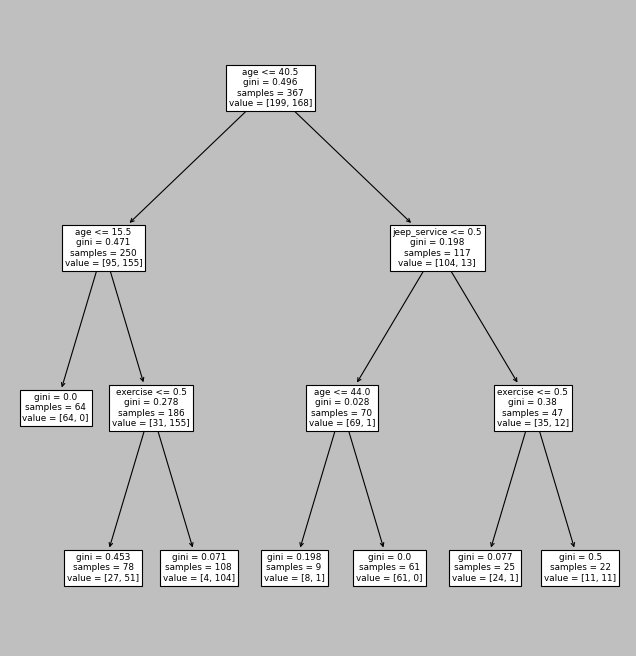

In [74]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=x.columns)
plt.show()

In [75]:
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  2],
       [ 1, 21]], dtype=int64)

Text(0.5, 23.999999999999986, 'True value')

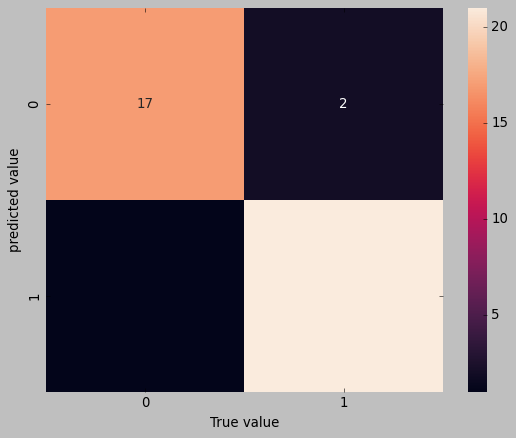

In [77]:
sns.heatmap(cm,annot=True)
plt.ylabel('predicted value')
plt.xlabel('True value')

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      0.95      0.93        22

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.93        41
weighted avg       0.93      0.93      0.93        41



#### model 3 Randon forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,2
1,24,1,1,1,0,1,0,1,1,2
2,23,1,1,0,0,0,1,1,1,2
3,25,1,1,0,0,0,0,1,1,2
4,22,1,0,0,0,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,6
404,15,0,1,1,0,1,0,1,0,3
405,16,0,1,1,1,0,1,1,1,3
406,17,0,1,1,0,0,0,1,0,3


In [81]:
x=data.drop('status',axis=1)
y=data['status']

In [82]:
x

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,Nomber of team members
0,23,1,1,1,0,0,1,1,2
1,24,1,1,1,0,1,0,1,2
2,23,1,1,0,0,0,1,1,2
3,25,1,1,0,0,0,0,1,2
4,22,1,0,0,0,1,0,1,6
...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,6
404,15,0,1,1,0,1,0,1,3
405,16,0,1,1,1,0,1,1,3
406,17,0,1,1,0,0,0,1,3


In [83]:
y

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    1
406    0
407    1
Name: status, Length: 408, dtype: int32

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [85]:
model=RandomForestClassifier(n_estimators=300,random_state=33)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=33)

In [86]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [87]:
pd.DataFrame({'True y value':y_test,'predicted value':y_pred})

,True y value,predicted value
96,1,0
38,1,1
0,1,1
34,1,1
249,0,0
...,...,...
357,1,1
17,1,1
62,1,1
182,0,0


In [88]:
model.score(x_test,y_test)

0.9313725490196079

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[51,  5],
       [ 2, 44]], dtype=int64)

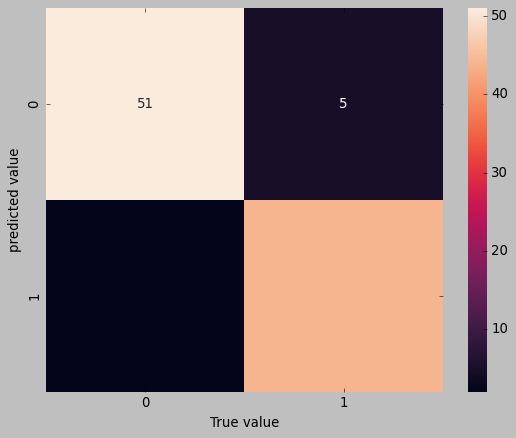

In [91]:
sns.heatmap(cm,annot=True)
plt.ylabel('predicted value')
plt.xlabel('True value')
plt.show()

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.90      0.96      0.93        46

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102



#### model 4 K nearest neighbour

In [93]:
from sklearn.neighbors import KNeighborsClassifier


In [94]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,2
1,24,1,1,1,0,1,0,1,1,2
2,23,1,1,0,0,0,1,1,1,2
3,25,1,1,0,0,0,0,1,1,2
4,22,1,0,0,0,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,6
404,15,0,1,1,0,1,0,1,0,3
405,16,0,1,1,1,0,1,1,1,3
406,17,0,1,1,0,0,0,1,0,3


In [95]:
x=data.drop('status',axis=1)
y=data['status']

In [96]:
x

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,Nomber of team members
0,23,1,1,1,0,0,1,1,2
1,24,1,1,1,0,1,0,1,2
2,23,1,1,0,0,0,1,1,2
3,25,1,1,0,0,0,0,1,2
4,22,1,0,0,0,1,0,1,6
...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,6
404,15,0,1,1,0,1,0,1,3
405,16,0,1,1,1,0,1,1,3
406,17,0,1,1,0,0,0,1,3


In [97]:
y

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    1
406    0
407    1
Name: status, Length: 408, dtype: int32

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [99]:
model=KNeighborsClassifier(n_neighbors=30)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [100]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [101]:
pd.DataFrame({'True value':y_test,'predicted value':y_pred})

,True value,predicted value
96,1,0
38,1,1
0,1,1
34,1,1
249,0,0
...,...,...
357,1,1
17,1,1
62,1,1
182,0,0


In [102]:
model.score(x_test,y_test)

0.8725490196078431

In [103]:
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[51,  5],
       [ 8, 38]], dtype=int64)

Text(0.5, 23.999999999999986, 'True value')

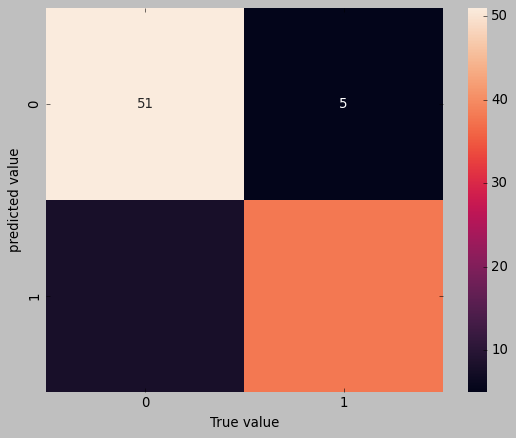

In [105]:
sns.heatmap(cm,annot=True)
plt.ylabel('predicted value')
plt.xlabel('True value')

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.88      0.83      0.85        46

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.87      0.87      0.87       102

